In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data_file = '../data/all_trades_at_5.pkl'
price_data_file = '../data/merged_price_instit_data.pkl'

df = pd.read_pickle(data_file)
price_df = pd.read_pickle(price_data_file)

In [3]:
display(df)

,start_date,institutional_ownership,permno,cusip,return_30,30-end,return_90,90-end,return_180,180-end,alpha_30,alpha_90,alpha_180,institutional_ownership_bin
0,2018-11-06,0.356346,14945,00030710,-0.314190,2018-12-06 00:00:00,-0.125004,2019-02-04 00:00:00,-0.334461,2019-05-06 00:00:00,-0.271506,-0.090372,-0.357250,20-40%
1,2008-10-09,0.503137,90825,00081T10,-0.505496,2008-11-10 00:00:00,-0.083517,2009-01-07 00:00:00,-0.753846,2009-04-07 00:00:00,-0.500909,-0.098665,-0.707198,40-60%
2,2010-06-30,0.488968,90825,00081T10,0.186373,2010-07-30 00:00:00,0.170339,2010-09-28 00:00:00,0.753504,2010-12-27 00:00:00,0.149452,0.207657,0.393308,40-60%
3,2011-09-22,0.639958,90825,00081T10,0.247400,2011-10-24 00:00:00,1.060293,2011-12-21 00:00:00,1.665281,2012-03-20 00:00:00,0.065515,0.698984,1.043633,60-80%
4,2020-03-16,0.754334,90825,00081T10,0.128450,2020-04-15 00:00:00,0.410834,2020-06-15 00:00:00,0.315651,2020-09-14 00:00:00,0.095548,-0.001233,-0.098414,60-80%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,2016-01-20,0.422057,81784,Y8564W10,0.552982,2016-02-19 00:00:00,1.255718,2016-04-19 00:00:00,0.484440,2016-07-18 00:00:00,0.501548,0.876793,0.174381,40-60%
8101,2018-11-19,0.148450,81784,Y8564W10,-0.164529,2018-12-19 00:00:00,-0.170969,2019-02-19 00:00:00,-0.075479,2019-05-20 00:00:00,-0.042312,-0.205017,-0.102519,0-20%
8102,2019-11-13,0.128710,81784,Y8564W10,0.050917,2019-12-13 00:00:00,-0.307534,2020-02-11 00:00:00,-0.327903,2020-05-11 00:00:00,0.012325,-0.361838,-0.145155,0-20%
8103,2015-12-17,0.466086,91656,Y8565J10,-0.156914,2016-01-19 00:00:00,0.583640,2016-03-16 00:00:00,0.213168,2016-06-14 00:00:00,-0.045029,0.651578,0.218153,40-60%


In [6]:
# agg by bin
agg_by_bin = df.groupby('institutional_ownership_bin').agg({'return_30': ['mean', 'median'], 'return_90': ['mean', 'median'], 'return_180': ['mean', 'median']})
agg_by_bin_alphas = df.groupby('institutional_ownership_bin').agg({'alpha_30': ['mean', 'median'], 'alpha_90': ['mean', 'median'], 'alpha_180': ['mean', 'median']})


display(agg_by_bin)
display(agg_by_bin_alphas)

return_30           return_90            \
                                 mean    median      mean    median   
institutional_ownership_bin                                           
0-20%                        0.022223  0.004096  0.047021  0.010102   
20-40%                       0.027813  0.008128  0.077709  0.020367   
40-60%                       0.035799  0.012823  0.101276  0.028507   
60-80%                       0.053853  0.025938  0.179799  0.036587   
80+                          0.054763 -0.013217  0.157494  0.007501   

                            return_180            
                                  mean    median  
institutional_ownership_bin                       
0-20%                         0.080455  0.010527  
20-40%                        0.127525  0.028108  
40-60%                        0.171089  0.052144  
60-80%                        0.246324  0.064171  
80+                           0.167971 -0.077314

alpha_30            alpha_90           alpha_180  \
                                 mean    median      mean    median      mean   
institutional_ownership_bin                                                     
0-20%                        0.002562 -0.010408 -0.009475 -0.031288 -0.015999   
20-40%                       0.008722 -0.007955  0.007014 -0.023450  0.006248   
40-60%                       0.012318 -0.007992  0.030032 -0.015363  0.037832   
60-80%                       0.028037 -0.005921  0.074615 -0.020010  0.086927   
80+                          0.029087 -0.028682  0.090382 -0.019198  0.057268   

                                       
                               median  
institutional_ownership_bin            
0-20%                       -0.064568  
20-40%                      -0.057220  
40-60%                      -0.032931  
60-80%                      -0.048539  
80+                         -0.097556

institutional_ownership_bin,0-20%,20-40%,40-60%,60-80%,80+
month_and_year,,,,,
2006-04,20,21,15,7,0
2006-05,15,17,13,8,1
2006-06,19,12,16,3,0
2006-07,4,7,6,2,0
2006-08,9,9,4,7,3
...,...,...,...,...,...
2021-04,25,12,3,3,0
2021-05,20,12,6,2,0
2021-06,23,6,2,4,1


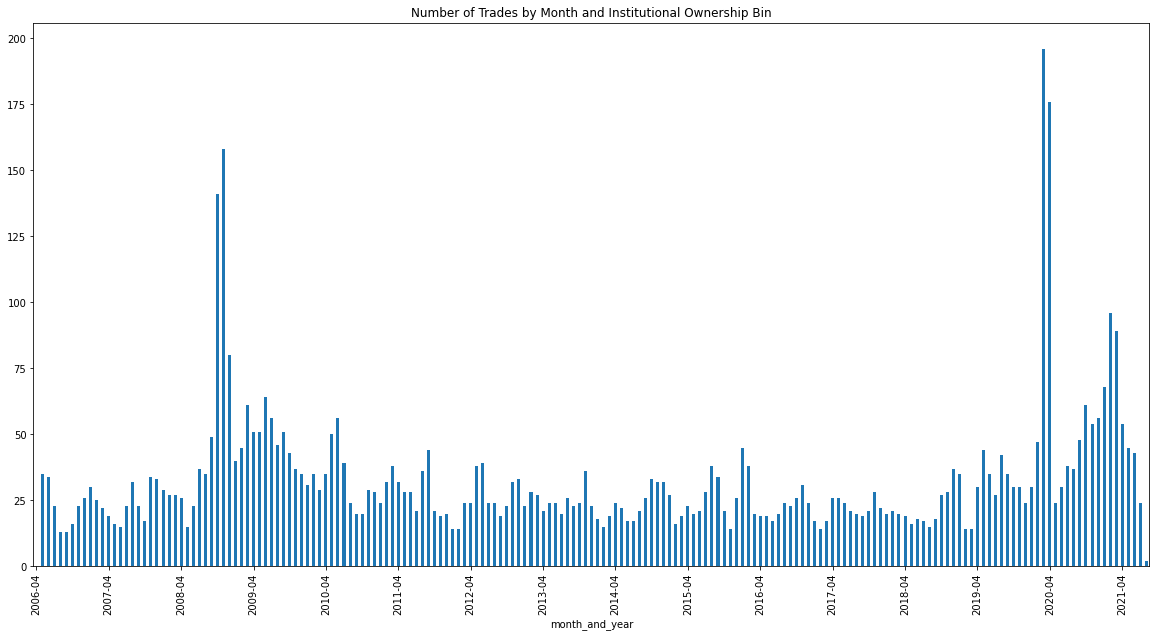

In [21]:
# Make a new column called month and year
df['month_and_year'] = df['start_date'].dt.to_period('M')

# agg by bin and month_and_year
agg_by_bin_and_month = df.groupby(['institutional_ownership_bin', 'month_and_year'])['start_date'].count()
agg_by_bin_and_month = agg_by_bin_and_month.unstack(level = 0)

display(agg_by_bin_and_month)

agg_by_bin_and_month['30-day_0-20%'] = agg_by_bin_and_month['0-20%'] + agg_by_bin_and_month['0-20%'].shift(1)
agg_by_bin_and_month['30-day_20-40%'] = agg_by_bin_and_month['20-40%'] + agg_by_bin_and_month['20-40%'].shift(1)
agg_by_bin_and_month['30-day_40-60%'] = agg_by_bin_and_month['40-60%'] + agg_by_bin_and_month['40-60%'].shift(1)
agg_by_bin_and_month['30-day_60-80%'] = agg_by_bin_and_month['60-80%'] + agg_by_bin_and_month['60-80%'].shift(1)
agg_by_bin_and_month['30-day_80+'] = agg_by_bin_and_month['80+'] + agg_by_bin_and_month['80+'].shift(1)

# plot for 0-20% bin treat index as date
fig, ax = plt.subplots(figsize = (20, 10))
agg_by_bin_and_month.unstack(level = 0)['30-day_0-20%'].plot(kind = 'bar', figsize = (20, 10), title = 'Number of Trades by Month and Institutional Ownership Bin', ax = ax)

# axis formatting x-axis labels; only print some of them
ax.set_xticks(range(0, len(agg_by_bin_and_month.unstack(level = 0)['30-day_0-20%']), 12))

plt.show()